# PatchTST Original - Weather Dataset Training

This notebook trains the PatchTST model on the weather dataset.

In [9]:
import os
os.chdir('/content/PatchTST/PatchTST_supervised')

!python '/content/PatchTST/notebooks/OriginalPatchTST.py'

Args in experiment:
Namespace(is_training=1, model_id='weather_336_336', model='PatchTST', data='custom', root_path='/content/PatchTST/datasets/weather', data_path='weather.csv', features='M', target='OT', freq='h', checkpoints='/content/model/checkpoints_weather', seq_len=336, label_len=48, pred_len=336, fc_dropout=0.05, head_dropout=0.0, patch_len=16, stride=8, padding_patch='end', revin=1, affine=0, subtract_last=0, decomposition=0, kernel_size=25, individual=0, channel_independent=1, multi_scale=0, patch_lengths='16', patch_strides='8', patch_weights='1.0', embed_type=0, enc_in=21, dec_in=21, c_out=21, d_model=512, n_heads=8, e_layers=2, d_layers=1, d_ff=2048, moving_avg=25, factor=1, distil=True, dropout=0.05, embed='timeF', activation='gelu', output_attention=False, do_predict=False, num_workers=0, itr=1, train_epochs=100, batch_size=16, patience=10, learning_rate=0.0001, des='Exp', loss='mse', lradj='type3', pct_start=0.3, use_amp=False, use_gpu=True, gpu=0, use_multi_gpu=False,

In [2]:
import os

# Setup paths
os.chdir('/content/PatchTST/PatchTST_supervised')
dataset_path = '/content/PatchTST/datasets/weather'
model_checkpoints = '/content/model/checkpoints_weather'

In [3]:
# Configuration
seq_len = 336
model_name = 'PatchTST'

In [4]:
import argparse
import torch
from exp.exp_main import Exp_Main
import random
import numpy as np

# Create argument namespace
args = argparse.Namespace()

# Basic config
args.is_training = 1
args.model_id = f'weather_{seq_len}_{seq_len}'
args.model = model_name

# Data loader
args.data = 'custom'
args.root_path = dataset_path  # Use the dataset_path variable defined earlier
args.data_path = 'weather.csv'
args.features = 'M'
args.target = 'OT'
args.freq = 'h'
args.checkpoints = model_checkpoints

# Forecasting task
args.seq_len = seq_len
args.label_len = 48
args.pred_len = 336

# PatchTST parameters
args.fc_dropout = 0.05
args.head_dropout = 0.0
args.patch_len = 16
args.stride = 8
args.padding_patch = 'end'
args.revin = 1
args.affine = 0
args.subtract_last = 0
args.decomposition = 0
args.kernel_size = 25
args.individual = 0
args.channel_independent = 1

# Multi-scale
args.multi_scale = 0
args.patch_lengths = '16'
args.patch_strides = '8'
args.patch_weights = '1.0'

# Model architecture
args.embed_type = 0
args.enc_in = 21
args.dec_in = 21
args.c_out = 21
args.d_model = 512
args.n_heads = 8
args.e_layers = 2
args.d_layers = 1
args.d_ff = 2048
args.moving_avg = 25
args.factor = 1
args.distil = True
args.dropout = 0.05
args.embed = 'timeF'
args.activation = 'gelu'
args.output_attention = False
args.do_predict = False

# Optimization
args.num_workers = 0
args.itr = 1
args.train_epochs = 100
args.batch_size = 16
args.patience = 10
args.learning_rate = 0.0001
args.des = 'Exp'
args.loss = 'mse'
args.lradj = 'type3'
args.pct_start = 0.3
args.use_amp = False

# GPU
args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0
args.use_multi_gpu = False
args.devices = '0,1,2,3'
args.test_flop = False

# Random seed
args.random_seed = 2021
fix_seed = args.random_seed
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

print('Args in experiment:')
print(args)


Args in experiment:
Namespace(is_training=1, model_id='weather_336_336', model='PatchTST', data='custom', root_path='/content/PatchTST/datasets/weather', data_path='weather.csv', features='M', target='OT', freq='h', checkpoints='/content/model/checkpoints_weather', seq_len=336, label_len=48, pred_len=336, fc_dropout=0.05, head_dropout=0.0, patch_len=16, stride=8, padding_patch='end', revin=1, affine=0, subtract_last=0, decomposition=0, kernel_size=25, individual=0, channel_independent=1, multi_scale=0, patch_lengths='16', patch_strides='8', patch_weights='1.0', embed_type=0, enc_in=21, dec_in=21, c_out=21, d_model=512, n_heads=8, e_layers=2, d_layers=1, d_ff=2048, moving_avg=25, factor=1, distil=True, dropout=0.05, embed='timeF', activation='gelu', output_attention=False, do_predict=False, num_workers=0, itr=1, train_epochs=100, batch_size=16, patience=10, learning_rate=0.0001, des='Exp', loss='mse', lradj='type3', pct_start=0.3, use_amp=False, use_gpu=True, gpu=0, use_multi_gpu=False,

In [10]:
# Verify test data for comparison
exp = Exp_Main(args)
print("\n" + "="*60)
print("TEST DATA VERIFICATION (DLinear Baseline)")
print("="*60)
# Get test data
test_data, test_loader = exp._get_data(flag='test')

# Get a sample batch to inspect
sample_batch = next(iter(test_loader))
batch_x, batch_y, batch_x_mark, batch_y_mark = sample_batch

print(f"Test loader info:")
print(f"  Total batches: {len(test_loader)}")
print(f"  Batch size: {batch_x.shape[0]}")
print(f"  Input shape (batch_x): {batch_x.shape}")
print(f"  Output shape (batch_y): {batch_y.shape}")
print(f"  Features in test_data: {test_data.data_x.shape[1] if hasattr(test_data, 'data_x') else 'N/A'}")

# Print first sample statistics for verification (FIRST 20 WEATHER FEATURES ONLY)
if hasattr(test_data, 'data_x') and len(test_data.data_x) > 0:
    first_sample_20 = test_data.data_x[0, :20]  # First 20 weather features (indices 0-19, exclude 'OT' at index 20)
    print(f"\nFirst test sample statistics (First 20 weather features only):")
    print(f"  Mean: {first_sample_20.mean():.6f}")
    print(f"  Std: {first_sample_20.std():.6f}")
    print(f"  Min: {first_sample_20.min():.6f}")
    print(f"  Max: {first_sample_20.max():.6f}")
    print(f"  Sum: {first_sample_20.sum():.6f}")

print("="*60)

Use GPU: cuda:0

TEST DATA VERIFICATION (DLinear Baseline)
test 10204
Test loader info:
  Total batches: 637
  Batch size: 16
  Input shape (batch_x): torch.Size([16, 336, 21])
  Output shape (batch_y): torch.Size([16, 384, 21])
  Features in test_data: 21

First test sample statistics (First 20 weather features only):
  Mean: -0.048374
  Std: 0.554955
  Min: -0.926592
  Max: 1.544642
  Sum: -0.967477


In [ ]:
    
# Train the model
for ii in range(args.itr):
    setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
        args.model_id,
        args.model,
        args.data,
        args.features,
        args.seq_len,
        args.label_len,
        args.pred_len,
        args.d_model,
        args.n_heads,
        args.e_layers,
        args.d_layers,
        args.d_ff,
        args.factor,
        args.embed,
        args.distil,
        args.des, ii)
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp = Exp_Main(args)
    exp.train(setting)

    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

## Evaluate Model on Test Set

Load the trained model checkpoint and evaluate MSE and MAE metrics.

In [ ]:
from utils.metrics import metric
import numpy as np

# Load the trained model checkpoint
checkpoint_path = os.path.join(args.checkpoints, setting, 'checkpoint.pth')
print(f'Loading model from: {checkpoint_path}')
exp.model.load_state_dict(torch.load(checkpoint_path))

# Get test data
test_data, test_loader = exp._get_data(flag='test')

# Evaluate on test set
preds = []
trues = []

exp.model.eval()
with torch.no_grad():
    for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(test_loader):
        batch_x = batch_x.float().to(exp.device)
        batch_y = batch_y.float().to(exp.device)
        
        # Model inference
        if 'Linear' in args.model or 'TST' in args.model:
            outputs = exp.model(batch_x)
        else:
            batch_x_mark = batch_x_mark.float().to(exp.device)
            batch_y_mark = batch_y_mark.float().to(exp.device)
            dec_inp = torch.zeros_like(batch_y[:, -args.pred_len:, :]).float()
            dec_inp = torch.cat([batch_y[:, :args.label_len, :], dec_inp], dim=1).float().to(exp.device)
            outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        
        # Extract predictions
        f_dim = -1 if args.features == 'MS' else 0
        outputs = outputs[:, -args.pred_len:, f_dim:]
        batch_y = batch_y[:, -args.pred_len:, f_dim:]
        
        preds.append(outputs.detach().cpu().numpy())
        trues.append(batch_y.detach().cpu().numpy())

# Convert to numpy arrays
preds = np.concatenate(preds, axis=0)
trues = np.concatenate(trues, axis=0)

# Calculate metrics
mae, mse, rmse, mape, mspe, rse, corr = metric(preds, trues)

print('\n' + '='*60)
print('TEST SET EVALUATION RESULTS')
print('='*60)
print(f'MSE:  {mse:.6f}')
print(f'MAE:  {mae:.6f}')
print('='*60)

Loading model from: /content/model/checkpoints_weather/weather_336_336_DLinear_custom_ftM_sl336_ll48_pl336_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/checkpoint.pth
test 10204

TEST SET EVALUATION RESULTS
MSE:  0.264505
MAE:  0.317695


In [ ]:
# DIRECT CSV COMPARISON - Check raw weather.csv data
import pandas as pd

print("\n" + "="*60)
print("RAW CSV DATA VERIFICATION (DLinear)")
print("="*60)

# Load the weather.csv
weather_csv_path = dataset_path  # This should be './datasets/weather/weather.csv'
weather_csv = pd.read_csv(weather_csv_path)

# Drop OT from original if present
if 'OT' in weather_csv.columns:
    weather_csv_clean = weather_csv.drop(columns=['OT'])
else:
    weather_csv_clean = weather_csv

print(f"\nWeather CSV shape: {weather_csv_clean.shape}")
print(f"Columns: {list(weather_csv_clean.columns)}")

# Check a specific row (e.g., row 10000)
test_row_idx = 10000
weather_row = weather_csv_clean.iloc[test_row_idx, 1:21].values  # Skip 'date', get first 20 features

print(f"\nRow {test_row_idx} statistics (first 20 weather features):")
print(f"  Mean: {weather_row.mean():.6f}")
print(f"  Std: {weather_row.std():.6f}")
print(f"  Sum: {weather_row.sum():.6f}")

print("="*60)

In [41]:
# DEEP DATA INSPECTION - Find exact test sample positions (DLinear)
print("\n" + "="*60)
print("DATA NORMALIZATION & SPLIT INSPECTION (DLinear)")
print("="*60)

# Check if scaler exists and display normalization parameters
if hasattr(test_data, 'scaler') and test_data.scaler is not None:
    scaler = test_data.scaler
    print(f"\nNormalization parameters:")
    if hasattr(scaler, 'mean_'):
        print(f"  Mean (first 5): {scaler.mean_[:5]}")
        print(f"  Std (first 5): {scaler.scale_[:5]}")
    print(f"  Scaler type: {type(scaler).__name__}")
else:
    print("\nNo scaler found - data may not be normalized")

# Check train/val/test split information
if hasattr(test_data, 'border1s') and hasattr(test_data, 'border2s'):
    print(f"\nData split borders:")
    print(f"  Test start index (border1s): {test_data.border1s}")
    print(f"  Test end index (border2s): {test_data.border2s}")
    print(f"  Test data length: {test_data.border2s - test_data.border1s}")

# Load the RAW CSV data (before normalization)
weather_csv_raw = pd.read_csv(dataset_path)
if 'OT' in weather_csv_raw.columns:
    weather_csv_raw = weather_csv_raw.drop(columns=['OT'])

# Get test data raw values (before normalization)
if hasattr(test_data, 'border1s'):
    test_start_idx = test_data.border1s
    # The first test sample corresponds to this row in the CSV
    first_test_row_idx = test_start_idx
    raw_first_test = weather_csv_raw.iloc[first_test_row_idx, 1:21].values  # First 20 weather features
    
    print(f"\nFirst test sample (CSV row {first_test_row_idx}, BEFORE normalization):")
    print(f"  Mean: {raw_first_test.mean():.6f}")
    print(f"  Std: {raw_first_test.std():.6f}")
    print(f"  Sum: {raw_first_test.sum():.6f}")
    
    # Now check the normalized version
    if hasattr(test_data, 'data_x') and len(test_data.data_x) > 0:
        normalized_first_test = test_data.data_x[0, :20]
        print(f"\nFirst test sample (AFTER normalization):")
        print(f"  Mean: {normalized_first_test.mean():.6f}")
        print(f"  Std: {normalized_first_test.std():.6f}")
        print(f"  Sum: {normalized_first_test.sum():.6f}")

print("="*60)


DATA NORMALIZATION & SPLIT INSPECTION (DLinear)

Normalization parameters:
  Mean (first 5): [990.64246184  11.97874319 285.90949982   5.4744086   67.52999105]
  Std (first 5): [ 8.63070983  7.71842219  7.91667631  6.46440578 18.75515933]
  Scaler type: StandardScaler


IsADirectoryError: [Errno 21] Is a directory: '/content/PatchTST/datasets/weather'


Visualizing ground truth from test data
Ground truth shape: (384, 21)


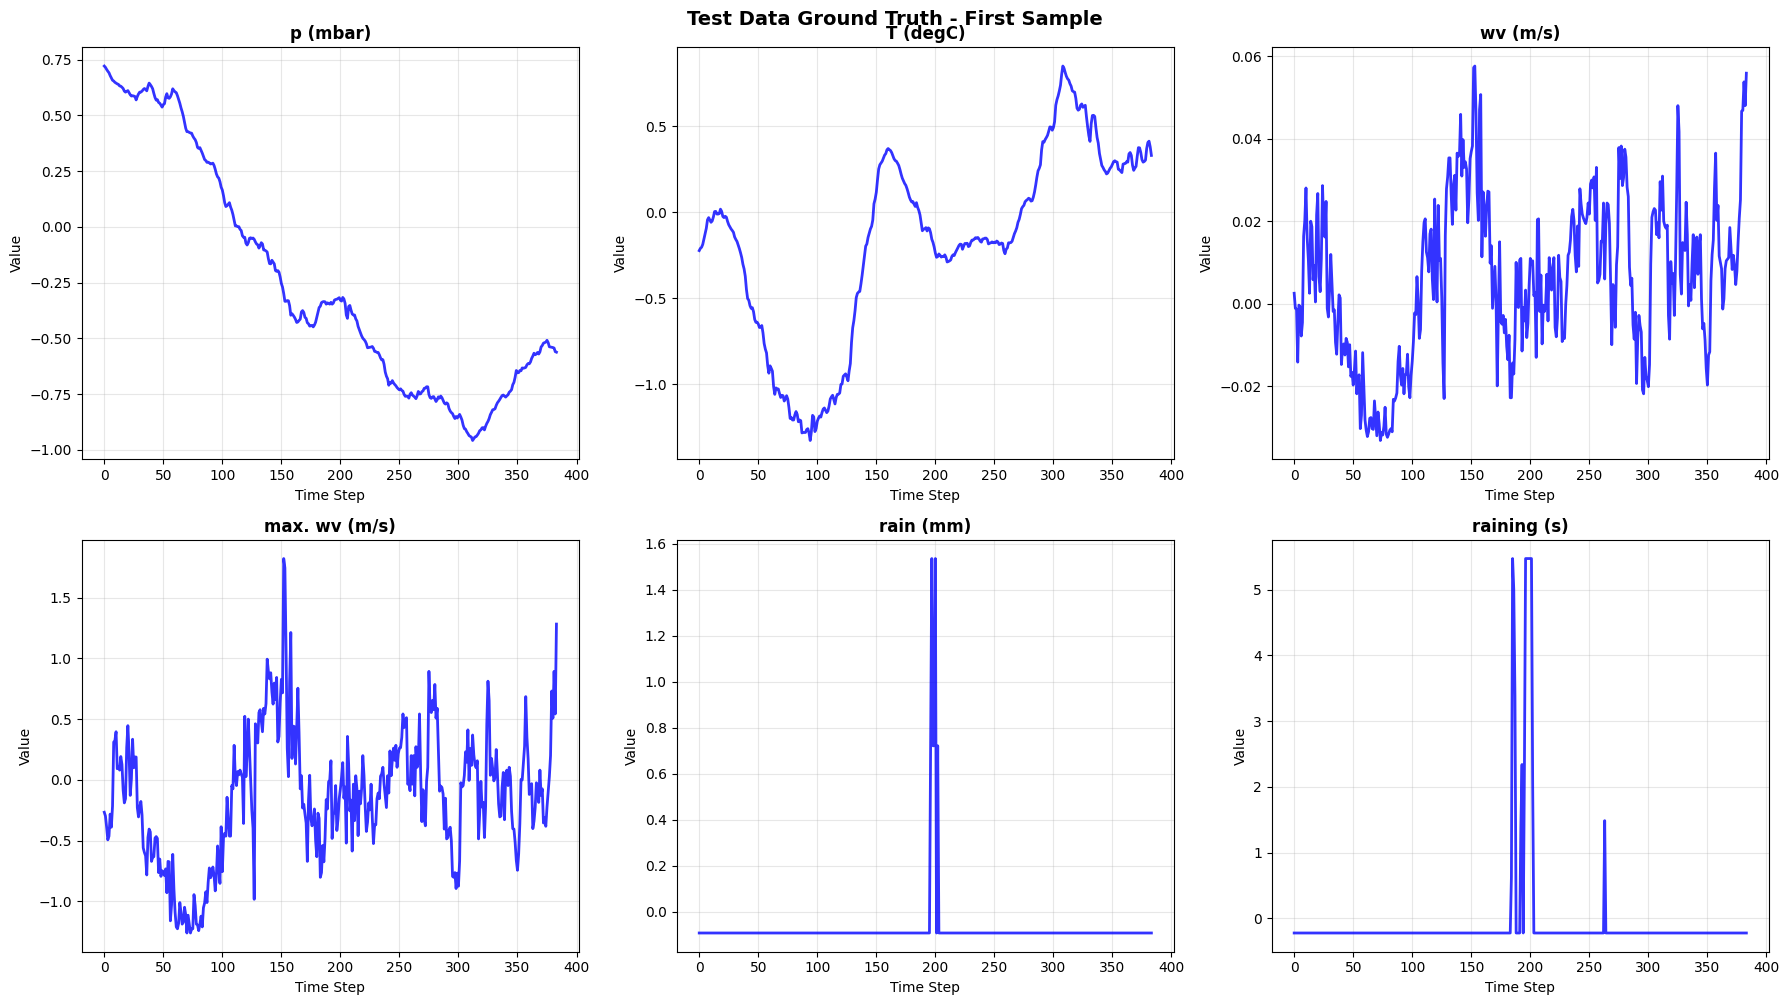

✓ Ground truth visualization complete


In [37]:
# Visualize ground truth for first test sample
%matplotlib inline
import matplotlib.pyplot as plt

# Features to visualize
features_to_plot = [
    'p (mbar)',           # air pressure
    'T (degC)',           # temperature
    'wv (m/s)',           # wind speed
    'max. wv (m/s)',      # maximum wind speed
    'rain (mm)',          # rainfall amount
    'raining (s)'         # rainfall duration
]

# All 22 feature names (20 weather + 2 hour)
all_feature_names = [
    'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 
    'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 
    'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 
    'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)', 
    'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'hour_sin', 'hour_cos'
]

# Get first test sample (using same seed as inference for consistency)
np.random.seed(2021)
if hasattr(test_data, 'data_x') and len(test_data.data_x) > 0:
    # Get the first sample's ground truth sequence
    first_sample = test_data.data_x[0]  # Shape: (22,) - single timestep
    
    # For visualization, we'll show a longer sequence - get from batch
    sample_gt = batch_y[0].cpu().numpy()  # Shape: (seq_len, 22)
    
    print(f"\nVisualizing ground truth from test data")
    print(f"Ground truth shape: {sample_gt.shape}")
    
    # Create figure
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    # Plot each feature
    for i, feature_name in enumerate(features_to_plot):
        feature_idx = all_feature_names.index(feature_name)
        ax = axes[i]
        
        time_steps = np.arange(len(sample_gt))
        ax.plot(time_steps, sample_gt[:, feature_idx], 
                linewidth=2, color='blue', alpha=0.8)
        
        ax.set_title(feature_name, fontsize=12, fontweight='bold')
        ax.set_xlabel('Time Step', fontsize=10)
        ax.set_ylabel('Value', fontsize=10)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('Test Data Ground Truth - First Sample', 
                 fontsize=14, fontweight='bold', y=1.00)
    plt.show()
    
    print(f"✓ Ground truth visualization complete")
else:
    print("Test data not available for visualization")

In [15]:
# Evaluate MSE/MAE on target features only
target_features = [
    'p (mbar)',           # air pressure
    'T (degC)',           # temperature
    'wv (m/s)',           # wind speed
    'max. wv (m/s)',      # maximum wind speed
    'rain (mm)',          # rainfall amount
    'raining (s)'         # rainfall duration
]

# Get feature names from the dataset
feature_names = test_data.feature_names if hasattr(test_data, 'feature_names') else [
    'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 
    'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 
    'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 
    'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)', 
    'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'OT'
]

# Get indices of target features
target_indices = [feature_names.index(feat) for feat in target_features if feat in feature_names]
print(f'Evaluating MSE/MAE on {len(target_indices)} target features: {", ".join(target_features)}')

# Filter predictions and ground truth to target features only
preds_target = preds[:, :, target_indices]
trues_target = trues[:, :, target_indices]

# Calculate metrics on target features only
mae, mse, rmse, mape, mspe, rse, corr = metric(preds_target, trues_target)

print('\n' + '='*60)
print('TEST SET EVALUATION RESULTS (Target Features Only)')
print('='*60)
print(f'MSE:  {mse:.6f}')
print(f'MAE:  {mae:.6f}')
print('='*60)
print(f'Predictions shape: {preds_target.shape}')
print(f'Ground truth shape: {trues_target.shape}')

Evaluating MSE/MAE on 6 target features: p (mbar), T (degC), wv (m/s), max. wv (m/s), rain (mm), raining (s)

TEST SET EVALUATION RESULTS (Target Features Only)
MSE:  0.468708
MAE:  0.351838
Predictions shape: (10192, 336, 6)
Ground truth shape: (10192, 336, 6)


## Visualize Predictions

Plot predictions vs ground truth for selected weather features.

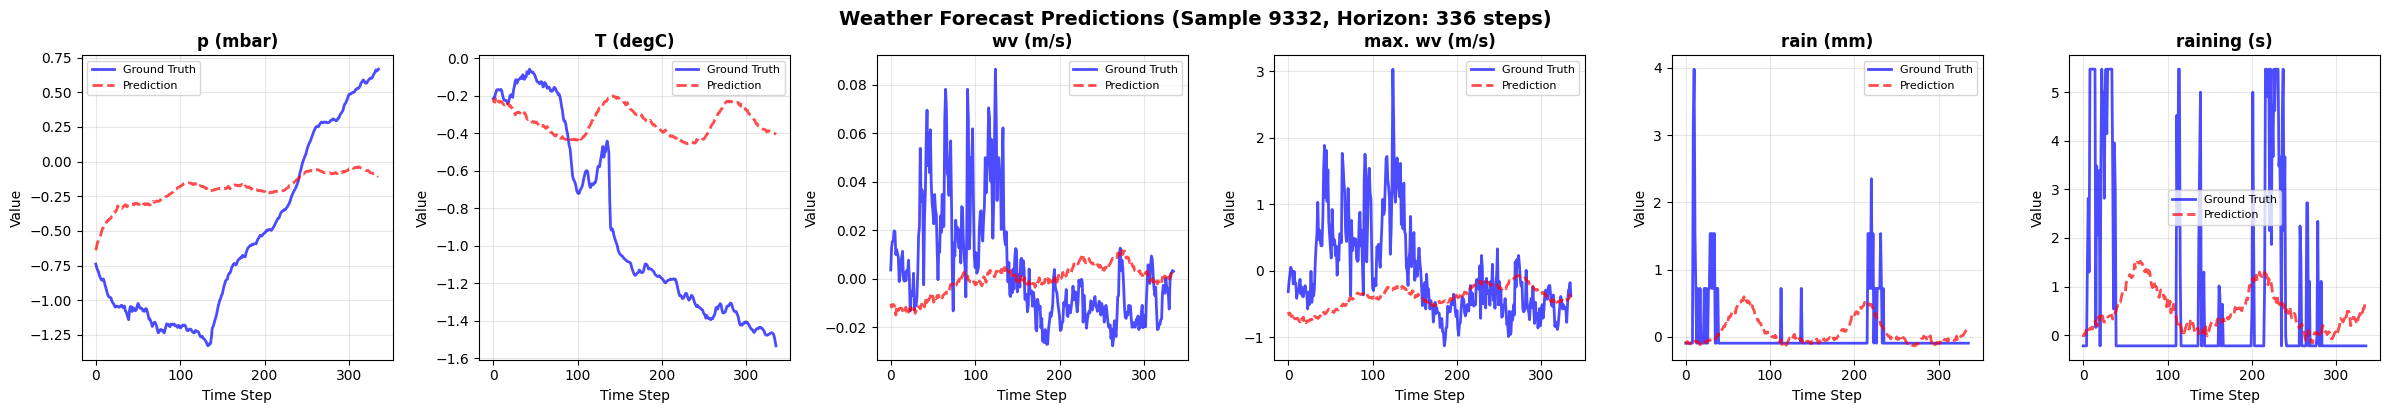

\nPlotted sample index: 9332


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Features to plot
features_to_plot = [
    'p (mbar)',           # air pressure
    'T (degC)',           # temperature
    'wv (m/s)',           # wind speed
    'max. wv (m/s)',      # maximum wind speed
    'rain (mm)',          # rainfall amount
    'raining (s)'         # rainfall duration
]

# Get feature names from the dataset
feature_names = test_data.feature_names if hasattr(test_data, 'feature_names') else [
    'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 
    'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 
    'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 
    'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)', 
    'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'OT'
]

# Get indices of features to plot
feature_indices = [feature_names.index(feat) for feat in features_to_plot if feat in feature_names]

# Select a random sample using seed 2021
np.random.seed(2021)
sample_idx = np.random.randint(0, len(preds))

# Get the sample prediction and ground truth
sample_pred = preds[sample_idx]  # Shape: (pred_len, num_features)
sample_true = trues[sample_idx]  # Shape: (pred_len, num_features)

# Create figure with subplots in one row
fig, axes = plt.subplots(1, len(feature_indices), figsize=(24, 4))

# Plot each feature
for i, feat_idx in enumerate(feature_indices):
    ax = axes[i]
    time_steps = np.arange(len(sample_pred))
    
    ax.plot(time_steps, sample_true[:, feat_idx], label='Ground Truth', 
            linewidth=2, color='blue', alpha=0.7)
    ax.plot(time_steps, sample_pred[:, feat_idx], label='Prediction', 
            linewidth=2, color='red', alpha=0.7, linestyle='--')
    
    ax.set_title(features_to_plot[i], fontsize=12, fontweight='bold')
    ax.set_xlabel('Time Step', fontsize=10)
    ax.set_ylabel('Value', fontsize=10)
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle(f'Weather Forecast Predictions (Sample {sample_idx}, Horizon: {args.pred_len} steps)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

print(f'\\nPlotted sample index: {sample_idx}')

In [17]:
# Export test data to CSV
import pandas as pd

# Get test data array from dataset
test_data_array = test_data.data_x  # Shape: (num_samples, num_features)

# Inverse transform to get original scale
test_data_original = test_data.scaler.inverse_transform(test_data_array)

# Create DataFrame
test_df = pd.DataFrame(test_data_original, columns=feature_names)

# Save to CSV in dataset folder
output_path = os.path.join(dataset_path, 'weather_test.csv')
test_df.to_csv(output_path, index=False)
print(f"Test data exported to {output_path}")
print(f"Shape: {test_df.shape}")
print(f"Columns: {list(test_df.columns)}")

Test data exported to /content/PatchTST/datasets/weather/weather_test.csv
Shape: (10875, 21)
Columns: ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)', 'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'OT']
